# Assignment 6 - Part 1: Linear Regression

Kavya Shah

PIN: 68

SUID:330126500
    
Email: kshah28@syr.edu
    
ref: https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/#:~:text=equation%3A%20y%20%3D%20A%2BB1x1,A%2C%20which%20is%20an%20intercept.


Problem:

1. Linear regression: Fit a line to go very near the 2017-2021 citation columns, minimizing MSE.

Use that line to predict the 2022 citation numbers, as in HW4.


In [1]:
# Import Libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score,log_loss



In [2]:
# Import csv
dataset = pd.read_csv('61-70.csv')

In [3]:
dataset.head()

,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
0,61,S,B,239,291,298,360,447,397,15,17
1,61,C,F,811,774,677,514,562,431,55,107
2,61,J,F,262,279,264,215,208,217,10,10
3,61,D,F,53,54,148,151,280,344,15,16
4,61,L,G,8,35,200,437,560,741,8,7


In [4]:
df = dataset.copy()

In [5]:
df.head()

,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
0,61,S,B,239,291,298,360,447,397,15,17
1,61,C,F,811,774,677,514,562,431,55,107
2,61,J,F,262,279,264,215,208,217,10,10
3,61,D,F,53,54,148,151,280,344,15,16
4,61,L,G,8,35,200,437,560,741,8,7


In [6]:
# Statistical Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   univ_rank      100 non-null    int64 
 1   first_initial  100 non-null    object
 2   last_initial   100 non-null    object
 3   cit_2017       100 non-null    object
 4   cit_2018       100 non-null    int64 
 5   cit_2019       100 non-null    int64 
 6   cit_2020       100 non-null    int64 
 7   cit_2021       100 non-null    int64 
 8   cit_2022       100 non-null    int64 
 9   h_index        100 non-null    int64 
 10  i_10_index     100 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 8.7+ KB


In [7]:
# Converting the DType of cit_2017 from object to int 
df['cit_2017'] = df['cit_2017'].str.replace(",","").astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   univ_rank      100 non-null    int64 
 1   first_initial  100 non-null    object
 2   last_initial   100 non-null    object
 3   cit_2017       100 non-null    int64 
 4   cit_2018       100 non-null    int64 
 5   cit_2019       100 non-null    int64 
 6   cit_2020       100 non-null    int64 
 7   cit_2021       100 non-null    int64 
 8   cit_2022       100 non-null    int64 
 9   h_index        100 non-null    int64 
 10  i_10_index     100 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.7+ KB


### Use the same data set for

1. Linear regression: Fit a line to go very near the 2017-2021 citation columns, minimizing MSE.
    
    Use that line to predict the 2022 citation numbers, as in HW4.

In [9]:
# Splitting the dataset into 80% training and 20% testing 

x = df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
y = df[['cit_2022']]

# Splitting your DataFrame 'df' into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size=0.2, random_state=42)

In [10]:
# Normalizing both the train and test data
scaler = MinMaxScaler(feature_range = (0,1))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [11]:
# Creating Linear regression Model
model_lr = LinearRegression().fit(x_train,y_train)

In [12]:
r_sq = model_lr.score(x_train,y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model_lr.intercept_}")
print(f"coeeficients: {model_lr.coef_}")

coefficient of determination: 0.9654490828398908
intercept: [14.52531454]
coeeficients: [[-1.26619715  3.39306477 -3.27135205  1.37629504  0.72556508]]


In [13]:
y_pred = model_lr.predict(x_test)
y_pred

array([[ 635.07876424],
       [ 116.65579308],
       [  84.47160242],
       [ 348.53546974],
       [ 194.1395104 ],
       [  59.81729422],
       [  73.47295935],
       [ 335.92042294],
       [ 318.68774986],
       [ 544.21693631],
       [ 299.78881715],
       [-175.28641896],
       [  16.91818985],
       [ 235.01861644],
       [  40.22786943],
       [ 476.63996917],
       [  58.90084472],
       [  85.77876995],
       [ 664.76494   ],
       [-111.22628065]])

In [14]:
y_test

,cit_2022
83,782
53,81
70,80
45,404
44,89
39,69
22,96
80,297
10,422
0,397


In [15]:
# Visualize the data using scatter plot and histogram
# sns.set_palette('colorblind')
# sns.pairplot(data=df, height=1)


In [16]:
slope = model_lr.coef_[0]
intercept = model_lr.intercept_
print(f"slope: {slope} \n intercept: {intercept}")

slope: [-1.26619715  3.39306477 -3.27135205  1.37629504  0.72556508] 
 intercept: [14.52531454]


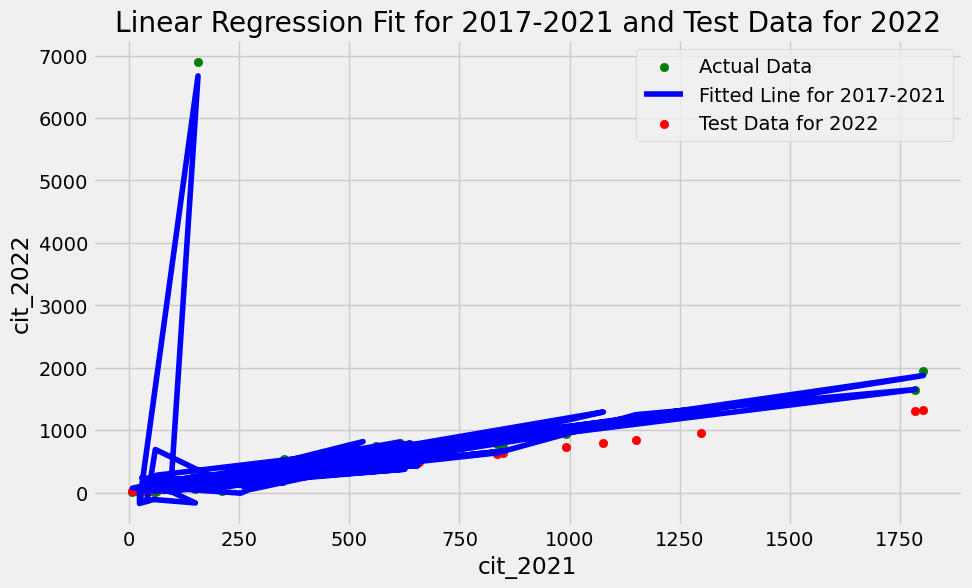

In [17]:

# Plotting the graph:
plt.style.use('fivethirtyeight')  
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(x['cit_2021'], y, color='green', label='Actual Data')

# Plotting the fitted line for 2017-2021
line_2017_2021 = model_lr.predict(x[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']])
plt.plot(x['cit_2021'], line_2017_2021, color='blue', label='Fitted Line for 2017-2021')

# Plotting the test data for 2022
plt.scatter(x['cit_2021'], x['cit_2021']*slope[4] + intercept, color='red', label='Test Data for 2022')

plt.title('Linear Regression Fit for 2017-2021 and Test Data for 2022')
plt.xlabel('cit_2021')
plt.ylabel('cit_2022')
plt.legend(loc="upper right")
plt.show()



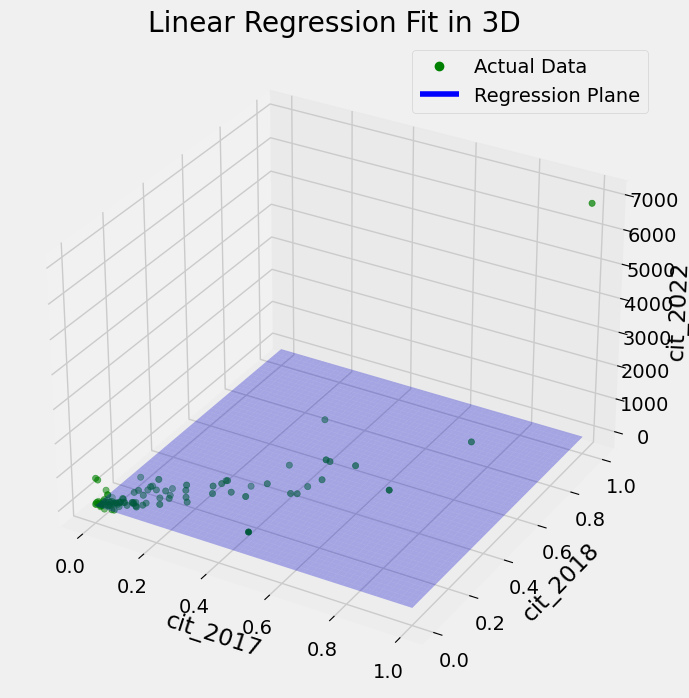

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Choose the first three years for the 3D plot
x_3d = df[['cit_2017', 'cit_2018', 'cit_2019']].values
y_3d = df['cit_2022'].values

# Normalize the data
x_3d_normalized = scaler.fit_transform(x_3d)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(x_3d_normalized[:, 0], x_3d_normalized[:, 1], y_3d, color='green', label='Actual Data')

# Plotting the regression plane
x_surf = np.linspace(0, 1, 100)
y_surf = np.linspace(0, 1, 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = model_lr.intercept_ + model_lr.coef_[0][0] * x_surf + model_lr.coef_[0][1] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.3)

# Creating a separate plot for legend
scatter_proxy = plt.Line2D([0], [0], linestyle="none", c='green', marker='o')
surface_proxy = plt.Line2D([0], [0], linestyle="-", c='blue')

# Adding legend
ax.legend([scatter_proxy, surface_proxy], ['Actual Data', 'Regression Plane'])

ax.set_xlabel('cit_2017')
ax.set_ylabel('cit_2018')
ax.set_zlabel('cit_2022')
ax.set_title('Linear Regression Fit in 3D')
plt.show()


In [19]:
# Calculating MSE for accuracy

mse_lr = mean_squared_error(y_test,y_pred)
print(f'Linear Regression Mean Squared Error : {mse_lr}')


Linear Regression Mean Squared Error : 14687.2157143493


In [20]:
# Convert arrays to DataFrames for better visualization
df_x_test = pd.DataFrame(x_test, columns=['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021'])
df_y_test = pd.DataFrame(y_test, columns=['cit_2022'])
df_y_pred = pd.DataFrame(y_pred, columns=['Predicted_cit_2022'])

# Reset indices before concatenating
df_x_test.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames horizontally
df_results = pd.concat([df_x_test, df_y_test, df_y_pred], axis=1)
df_results.to_csv('predicted_values.csv', index=False)
# Display the DataFrame with x_test, y_test, and predicted values
print(df_results)


    cit_2017  cit_2018  cit_2019  cit_2020  cit_2021  cit_2022  \
0       1251      1061       994       908       836       782   
1         79        91        93       103        77        81   
2        187       126       111       136        76        80   
3        169       210       261       291       398       404   
4        149       163       137       126       124        89   
5          0        26        63        69        94        69   
6        100        76        93       110       111        96   
7        379       360       321       309       282       297   
8         38        73       126       211       312       422   
9        239       291       298       360       447       397   
10       151       192       240       292       287       344   
11        32         0        52         3        23        42   
12       181       133       132       113        78        88   
13       101        94         1         9        28         2   
14        